<a href="https://colab.research.google.com/github/NitayAmiel/HW_AI_Course/blob/main/HW3_AI_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training the model

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model on the test set (no evaluation in your case, but for demonstration purposes)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')





Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.5176 - accuracy: 0.8214
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3906 - accuracy: 0.8603
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3506 - accuracy: 0.8742
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3231 - accuracy: 0.8827
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3556 - accuracy: 0.8733
Test accuracy: 0.8733000159263611


#plotting data's information

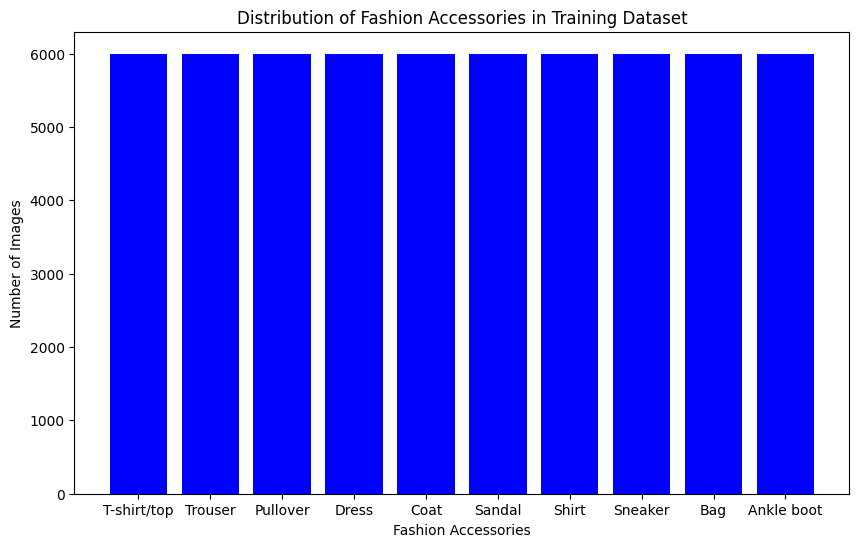

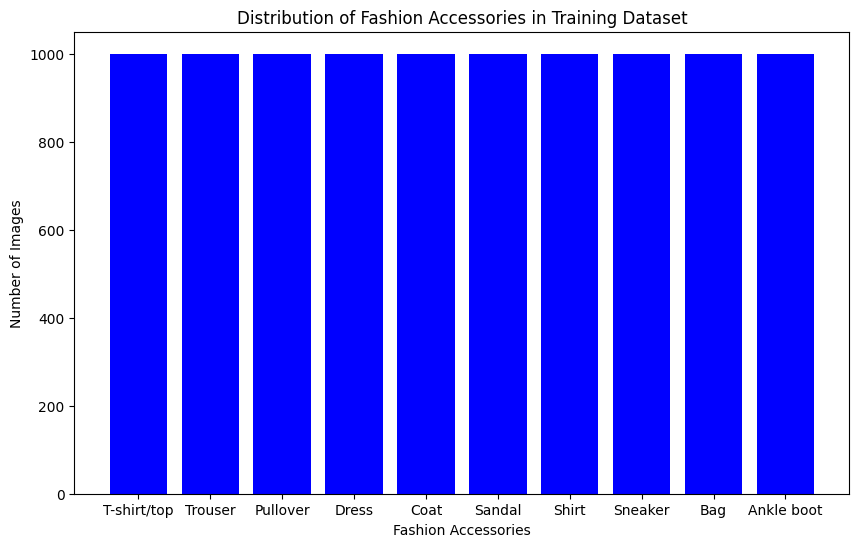

The Data is perfectly balnced :)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution( labels, class_names):
    labels_count = [0 for i in range(10)]
    for image in labels:
        for index, num in enumerate(image):
            labels_count[index] += num

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_names, labels_count, color='blue')
    plt.xlabel('Fashion Accessories')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Fashion Accessories in Training Dataset')
    plt.show()

# Assuming you have already loaded the Fashion MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Call the function to plot the distribution
plot_distribution(train_labels, class_names)
plot_distribution(test_labels, class_names)

print("The Data is perfectly balnced :)")



# Predictions

In [7]:
def extract_class(obj):
  for ind,i in enumerate(obj):
    if int(i) == 1:
      return ind

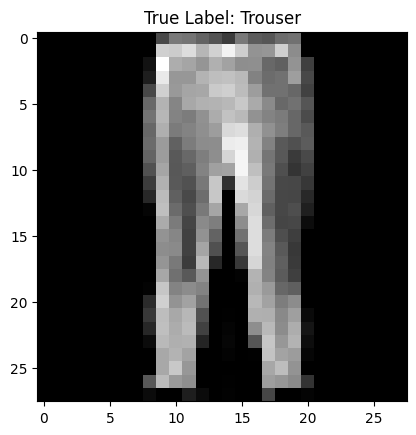

1/1 [==============================] - 0s 17ms/step
Predicted Label: Trouser
Prediction is correct!


In [25]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, test_images, test_labels, class_names):
    # Choose a random index from the test set
    index = np.random.randint(0, len(test_images))

    # Get the image and true label
    image = test_images[index]
    true_label = test_labels[index]
    true_label = extract_class(true_label)

    # Display the image and true label
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {class_names[true_label]}')
    plt.show()

    # Reshape the image for prediction
    image = image.reshape(1, 28, 28, 1)  # <-- Reshape to (1, 28, 28, 1)

    # Make a prediction using the model
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    # Display the predicted label
    print(f'Predicted Label: {class_names[predicted_label]}')

    # Compare the predicted label to the true label
    if predicted_label == true_label:
        print('Prediction is correct!')
    else:
        print('Prediction is incorrect.')

# Example usage
evaluate_model(model, test_images, test_labels, class_names)

